In [3]:
import tensorflow as tf
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout
from keras import regularizers
from keras import backend as K
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import matplotlib.pyplot as plt
import os

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

%matplotlib inline
np.random.seed(20181111)

In [4]:
num_training=180
models = []
histories = []

def load_data():
    data = np.loadtxt('Total1.csv', delimiter=',', skiprows=1)
    
    #mean = np.mean(data, axis=0, keepdims=True)
    #delta = data - mean
    #std = np.sqrt(np.mean(delta**2, axis=0, keepdims=True))
    #data = delta / std
    
    #data_max = np.max(data, axis=0, keepdims=True)
    #data = data / data_max 
    
    np.random.shuffle(data) 
    
    X = data[:, 1:]
    y = data[:, 0]

    return X, y

X, y = load_data();
X, y = load_data();

print('Dataset: ', X.shape)

X_train = X[:num_training, :]
y_train = y[:num_training]

X_test = X[num_training:, :]
y_test = y[num_training:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Dataset:  (240, 38)
X_train shape: (180, 38)
y_train shape: (180,)
X_test shape: (60, 38)
y_test shape: (60,)


In [5]:
activation='relu'

def regularizer():
    return keras.regularizers.l2(0.0005)

dropout = 0.15
node_count = 38

model = keras.models.Sequential([
    Dense(node_count, activation=activation, kernel_initializer='normal', kernel_regularizer=regularizer()),
    Dropout(dropout),
    Dense(int(node_count / 2), activation=activation, kernel_initializer='normal', kernel_regularizer=regularizer()),
    Dropout(dropout),
    Dense(int(node_count / 4), activation='sigmoid', kernel_initializer='normal', kernel_regularizer=regularizer()),
    Dropout(dropout),
    Dense(1)])


def loss(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return K.abs(SS_res/(SS_tot))

def r2(y, y_pred):
    return 1.0 - loss(y, y_pred)

model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss=loss,
              metrics=[r2, 'mse', 'mae', 'mape', 'cosine'])

history = model.fit(X_train, y_train,batch_size=180, epochs=2000, verbose=0, validation_split=0.05)
models.append(model)
histories.append(history)
weights = model.layers[0].get_weights()[0]

In [6]:
biases = model.layers[0].get_weights()[1]
weights1 = model.layers[0].get_weights()[0]

In [7]:
print(weights)
print(biases)

[[ 3.02062780e-02  1.42924599e-02 -3.81754013e-03 ...  6.03028166e-04
  -2.76243031e-01  4.51515801e-02]
 [ 3.44476923e-02 -1.80213246e-02  2.51558069e-02 ...  1.06061757e-01
   1.00194048e-02 -1.37634605e-01]
 [-3.06532532e-01  4.25829850e-02  2.96543479e-01 ...  7.07375050e-01
  -4.48478281e-01  4.27344173e-01]
 ...
 [-2.46198028e-02 -1.82014226e-03 -6.88019320e-02 ... -2.79735893e-01
   1.73353851e-01 -1.31370395e-01]
 [ 6.72857277e-04 -2.14202027e-03 -2.58702077e-02 ... -1.28290296e-01
   1.02347486e-01 -9.47866365e-02]
 [ 3.03491801e-02  9.81621910e-03 -9.54308733e-02 ...  7.59730581e-03
  -4.03426401e-02 -7.12720379e-02]]
[-0.01539422 -0.01595311 -0.02965119  0.0684939  -0.01918609  0.04372998
  0.02494183 -0.09838837  0.03265971 -0.06590041 -0.01235602  0.02455634
  0.06371347  0.01870031  0.03703274  0.03571224  0.00678522  0.00526755
  0.01529093  0.03337133 -0.0524203  -0.08337811  0.02567458  0.03149341
 -0.03927231 -0.0200327  -0.04697808 -0.01015074  0.02063312  0.04010742

In [8]:
score_test = model.evaluate(X_test, y_test)
print("Test====")
print(model.metrics_names)
print(score_test)

60/60 [==============================] - 0s 216us/step
Test====
['loss', 'r2', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity']
[0.780260686079661, 0.23676469723383586, 0.09540352125962576, 0.12765680452187855, 164.083842976888, -1.0]


In [7]:
score_train = model.evaluate(X_train, y_train)
print("Train====")
print(model.metrics_names)
print(score_train)

180/180 [==============================] - 0s 88us/step
Train====
['loss', 'r2', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity']
[0.19360014804535441, 0.8223760724067688, 0.009530149462322394, 0.0614156456457244, 109.21354437934028, -1.0]


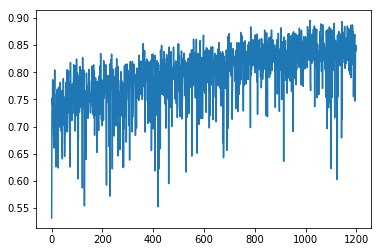

In [9]:
plot_begin = 800
history.history['r2'][plot_begin:]
plt.plot(history.history['r2'][plot_begin:])
#plt.plot(history.history['r2'][plot_begin:], label="Train")

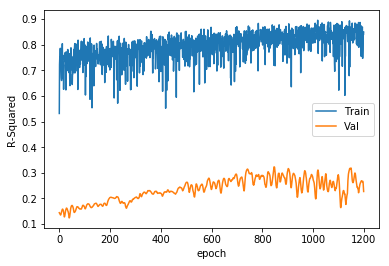

In [10]:
plot_begin = 800
# plot metrics

plt.plot(history.history['r2'][plot_begin:], label="Train")
plt.plot(history.history['val_r2'][plot_begin:], label="Val")
plt.ylabel('R-Squared')
plt.xlabel('epoch')
plt.legend()
plt.show()

60/60 [==============================] - 0s 94us/step
Test====
['loss', 'r2', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity']
[0.780260686079661, 0.23676469723383586, 0.09540352125962576, 0.12765680452187855, 164.083842976888, -1.0]
180/180 [==============================] - 0s 64us/step
Train====
['loss', 'r2', 'mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error', 'cosine_proximity']
[0.15341188179122078, 0.8636135286755032, 0.0076573482818073696, 0.057797804971536, 104.81433919270833, -1.0]


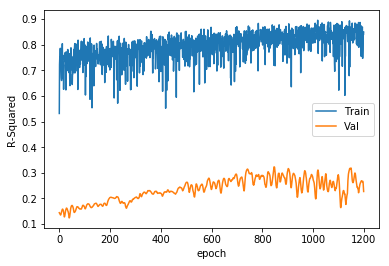

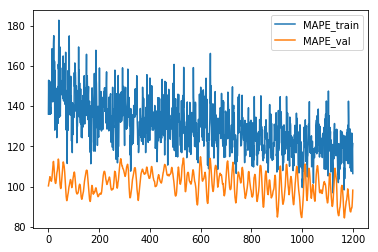

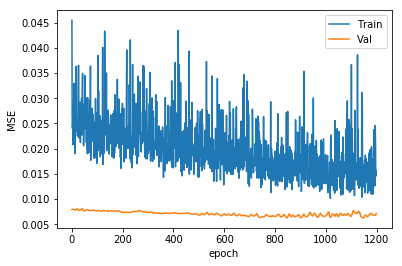

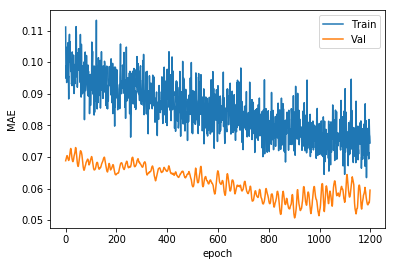

In [11]:
score_test = model.evaluate(X_test, y_test)
print("Test====")
print(model.metrics_names)
print(score_test)


score_train = model.evaluate(X_train, y_train)
print("Train====")
print(model.metrics_names)
print(score_train)

plot_begin = 800
# plot metrics

plt.plot(history.history['r2'][plot_begin:], label="Train")
plt.plot(history.history['val_r2'][plot_begin:], label="Val")
plt.ylabel('R-Squared')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot(history.history['mean_absolute_percentage_error'][plot_begin:], label="MAPE_train")
plt.plot(history.history['val_mean_absolute_percentage_error'][plot_begin:], label="MAPE_val")
plt.legend()
plt.show()

plt.plot(history.history['mean_squared_error'][plot_begin:], label="Train")
plt.plot(history.history['val_mean_squared_error'][plot_begin:], label="Val")
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend()
plt.show()

plt.plot(history.history['mean_absolute_error'][plot_begin:], label="Train")
plt.plot(history.history['val_mean_absolute_error'][plot_begin:], label="Val")
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 38)                1482      
_________________________________________________________________
dropout_1 (Dropout)          (None, 38)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 19)                741       
_________________________________________________________________
dropout_2 (Dropout)          (None, 19)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 180       
_________________________________________________________________
dropout_3 (Dropout)          (None, 9)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 10        
Total para

In [772]:
history.history['val_r2'][1999]

0.3437715172767639

In [773]:
y_pred = model.predict(X_test, batch_size=180)

In [774]:
y_pred

array([[0.07288117],
       [0.09444185],
       [0.1596787 ],
       [0.2781999 ],
       [0.0706834 ],
       [0.09976018],
       [0.14715438],
       [0.07575011],
       [0.10915101],
       [0.06226761],
       [0.10655048],
       [0.10674974],
       [0.08179154],
       [0.06680674],
       [0.07767989],
       [0.06268746],
       [0.07225399],
       [0.11242347],
       [0.09295098],
       [0.65167713],
       [0.11598638],
       [0.07485589],
       [0.20328437],
       [0.1390166 ],
       [0.10436076],
       [0.07139481],
       [0.07777844],
       [0.06680375],
       [0.07052423],
       [0.07613162],
       [0.07177098],
       [0.07656171],
       [0.07654585],
       [0.07942695],
       [0.09392741],
       [0.08462636],
       [0.12110917],
       [0.10881002],
       [0.07681088],
       [0.06789571],
       [0.08106346],
       [0.07437943],
       [0.07893836],
       [0.07228097],
       [0.33822766],
       [0.06810263],
       [0.08046576],
       [0.635

In [775]:
y_test

array([0.012     , 0.03571429, 0.276     , 0.56      , 0.179     ,
       0.0175    , 0.15857143, 0.03833333, 0.02857143, 0.02      ,
       0.04714286, 0.08142857, 0.01666667, 0.01      , 0.08571429,
       0.045     , 0.095     , 0.052     , 0.148     , 1.76444444,
       0.065     , 0.05      , 0.05      , 0.0525    , 0.1       ,
       0.064     , 0.01333333, 0.05571429, 0.02875   , 0.074     ,
       0.02      , 0.078     , 0.03125   , 0.015     , 0.03      ,
       0.095     , 1.73222222, 0.016     , 0.0525    , 0.015     ,
       0.03857143, 0.02375   , 0.02      , 0.0425    , 0.04      ,
       0.03      , 0.078     , 0.658125  , 0.03428571, 0.42571429,
       0.0325    , 0.044     , 0.103375  , 0.015     , 0.415     ,
       0.18166667, 1.15      , 0.121     , 0.04428571, 0.215     ])

In [776]:
np.savetxt("4.csv", y_pred, delimiter=",")

In [777]:
np.savetxt("5.csv", y_test, delimiter=",")

In [778]:
data1 = np.loadtxt('4.csv',delimiter=',',skiprows=0) 

In [780]:
data2 = np.loadtxt('5.csv',delimiter=',',skiprows=0) 

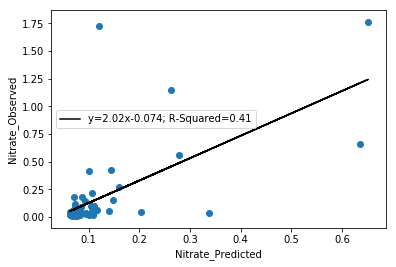

In [832]:
fit=np.polyfit(data1,data2,1)
fit_fn = np.poly1d(fit) 
plt.plot(data1, fit_fn(data1), '-k',label='y=2.02x-0.074; R-Squared=0.41')
plt.ylabel('Nitrate_Observed')
plt.xlabel('Nitrate_Predicted')
plt.legend()
plt.scatter(data1, data2)
plt.show()
